# GROUP 3 -SNAPCHAT REVIEW ANALYSIS

# Problem Statement



1. Problem Statement:

>As the IT manager responsible for scrutinizing the functional aspects of the Snapchat mobile application in India, where the majority of users are on Android, it is imperative to gain insights from user feedback. The primary focus is on negative reviews on the Google Play Store, which often reveal critical issues faced by customers. The objective is to extract and analyze the latest 1 lakh reviews with ratings less than 3, specifically honing in on reviews with more than 5 words and written in English. Following this, conduct an emotional analysis to comprehend overall user sentiments. To refine the analysis, further scrutinize reviews containing the words "issue" or "problem" with accompanying emotions of "anger" or "fear." Subsequently, interpret these specific reviews to provide actionable recommendations for enhancing the Snapchat application.


2. Objectives:

- Extract the latest 1 lakh reviews from the Google Play Store for the mobile application.
- Filter reviews with ratings less than 3 to focus on negative feedback.
- Further filter reviews with more than 5 words to facilitate emotional analysis.
- Conduct emotional analysis on the remaining reviews to understand overall sentiments.
- Identify reviews containing the words "issue" or "problem" with emotions of "anger" or "fear."
- Interpret these specific reviews to provide insights and recommendations for improvements.
- Code the entire process in Python, utilizing relevant libraries for web scraping, text analysis, and emotion recognition.
- Ensure the code is efficient, scalable, and follows best practices for data handling and analysis.
- Present the findings and recommendations in a clear and actionable manner for the development team to implement improvements.

All the 100000 reviews have been stored in SnapchatInitialReview
All the  filtered negative reviews have been stored in Snapchat_Final_Review.csv

In [1]:
!pip install google_play_scraper 


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

# 1. EXTRACTION OF 1 LAKH DATA

>The below Python code uses the google_play_scraper library to fetch reviews for the Snapchat app from the Google Play Store. It retrieves the reviews in English from the United States, sorted by the newest first. The count parameter specifies the maximum number of reviews to fetch, and in this case, it's set to 100,000. The filter_score_with parameter is set to None, indicating that reviews of all scores will be included. The fetched reviews and a continuation token (for paginated results) are stored in the variables result and continuation_token, respectively.

In [3]:
##Snapchat Reviews: 

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.snapchat.android',
    lang='en', # defaults to english language
    country='us', # defaults to us 
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=100000, # defaults to 1 lakh
    filter_score_with=None # defaults to None(means all score)
)

In [4]:
result #Scrapped Data

[{'reviewId': '007b588f-5290-4819-bed6-67d44c6e2141',
  'userName': 'Dude Man',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWDkXYNLXbwtRfMHFTAXgVR7mkVhkNn_I5I2hRPMqoTvkk',
  'content': "I loved this app, but ever since the last update the filters don't work. Any filter that alters someone's face, I can take a picture but I can't take video anymore. The audio will come up normally and yet the video is like it's doing a slideshow, each frame holds for 5 seconds before switching to the next. Most of the app functions normally but filters that alter people's faces just will not work and it's driving me insane. They worked a couple weeks ago so what did you guys do????",
  'score': 1,
  'thumbsUpCount': 15370,
  'reviewCreatedVersion': '12.60.0.58',
  'at': datetime.datetime(2023, 11, 14, 11, 47, 40),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '12.60.0.58'},
 {'reviewId': '41c07c62-9fa5-4d31-bb3c-a09dd9a7ae9f',
  'userName': 'Chris Monnin',
  'userImage'

In [5]:
df_rev = pd.DataFrame(np.array(result),columns=['review'])
df_rev = df_rev.join(pd.DataFrame(df_rev.pop('review').tolist()))#Dataframe contains the reviews of Snapchat

In [6]:
df_rev #Dataframe contains the google play reviews of Snapchat

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,007b588f-5290-4819-bed6-67d44c6e2141,Dude Man,https://play-lh.googleusercontent.com/a-/ALV-U...,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,2023-11-14 11:47:40,None,None,12.60.0.58
1,41c07c62-9fa5-4d31-bb3c-a09dd9a7ae9f,Chris Monnin,https://play-lh.googleusercontent.com/a-/ALV-U...,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,2023-11-22 23:20:27,None,None,12.60.0.58
2,6de2d820-e5fe-4491-9cd9-4bac39309ddb,Ian Zang,https://play-lh.googleusercontent.com/a-/ALV-U...,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,2023-11-23 03:45:01,None,None,12.60.0.58
3,c650d3e1-7a49-4b45-a628-ac55a6be8a58,Brad Kelly,https://play-lh.googleusercontent.com/a/ACg8oc...,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,2023-11-16 06:46:01,None,None,12.60.0.58
4,98c9c96c-0a1b-4a21-8400-5ed194bfbbb2,Caden,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app feels better in some ways, but still h...",2,159,12.60.0.58,2023-11-24 14:44:18,None,None,12.60.0.58
...,...,...,...,...,...,...,...,...,...,...,...
99995,5e1890a2-0431-4f1e-9025-f4076ecae797,Yaya Mccray,https://play-lh.googleusercontent.com/a/ACg8oc...,Because Its fun,5,0,12.60.0.58,2023-11-22 03:51:09,None,None,12.60.0.58
99996,564277a7-4a96-4c04-99fb-e1106d839350,Fiona Bongiwe Manyike,https://play-lh.googleusercontent.com/a/ACg8oc...,It keeps saying 'Oops! Something went wrong' E...,1,0,10.72.0.0,2021-09-09 02:35:55,None,None,10.72.0.0
99997,a28c96c2-d640-453e-a1fd-53f15854a80c,Leona Evelyn,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst app ever. My brother mistakenly uninstal...,1,0,None,2020-06-09 15:35:15,None,None,None
99998,ae1a249a-637a-4c6c-b59e-e270aa2f4aee,Gracye Crum,https://play-lh.googleusercontent.com/a-/ALV-U...,I keep having to reinstall the app because it ...,3,0,12.03.0.22,2022-10-19 10:36:02,None,None,12.03.0.22


In [8]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100000 non-null  object        
 1   userName              100000 non-null  object        
 2   userImage             100000 non-null  object        
 3   content               100000 non-null  object        
 4   score                 100000 non-null  int64         
 5   thumbsUpCount         100000 non-null  int64         
 6   reviewCreatedVersion  84321 non-null   object        
 7   at                    100000 non-null  datetime64[ns]
 8   replyContent          0 non-null       object        
 9   repliedAt             0 non-null       object        
 10  appVersion            84321 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 8.4+ MB


In [9]:
df_rev['content'] #Dataframe contains the reviews of Snapchat

0        I loved this app, but ever since the last upda...
1        Pretty much the only way I communicate. But re...
2        Good to stay in touch with friends. Everything...
3        Please for the love of God fix the notificatio...
4        The app feels better in some ways, but still h...
                               ...                        
99995                                      Because Its fun
99996    It keeps saying 'Oops! Something went wrong' E...
99997    Worst app ever. My brother mistakenly uninstal...
99998    I keep having to reinstall the app because it ...
99999    PRETTY GOOD. Many filters, good camera, and ha...
Name: content, Length: 100000, dtype: object

In [10]:
df_initial=df_rev['content']

In [11]:
#converting data frame to csv .This is the original list of 1 Lakh reviews
df_initial.to_csv('SnapchatInitialReview.csv')
#print('\nCSV String:\n', csv_data1)

In [12]:
df_initial #initial review list

0        I loved this app, but ever since the last upda...
1        Pretty much the only way I communicate. But re...
2        Good to stay in touch with friends. Everything...
3        Please for the love of God fix the notificatio...
4        The app feels better in some ways, but still h...
                               ...                        
99995                                      Because Its fun
99996    It keeps saying 'Oops! Something went wrong' E...
99997    Worst app ever. My brother mistakenly uninstal...
99998    I keep having to reinstall the app because it ...
99999    PRETTY GOOD. Many filters, good camera, and ha...
Name: content, Length: 100000, dtype: object

In [13]:
#Counting the number of words 
def length(text):
    return len(text.split())

# Adding "no of word" column to the dataframe

In [14]:
df_rev["No_of_words"]=df_rev['content'].apply(lambda x: length(x)) #Calculating no of words for each review

In [15]:
 df_rev.head() 

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,No_of_words
0,007b588f-5290-4819-bed6-67d44c6e2141,Dude Man,https://play-lh.googleusercontent.com/a-/ALV-U...,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,2023-11-14 11:47:40,None,None,12.60.0.58,91
1,41c07c62-9fa5-4d31-bb3c-a09dd9a7ae9f,Chris Monnin,https://play-lh.googleusercontent.com/a-/ALV-U...,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,2023-11-22 23:20:27,None,None,12.60.0.58,60
2,6de2d820-e5fe-4491-9cd9-4bac39309ddb,Ian Zang,https://play-lh.googleusercontent.com/a-/ALV-U...,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,2023-11-23 03:45:01,None,None,12.60.0.58,60
3,c650d3e1-7a49-4b45-a628-ac55a6be8a58,Brad Kelly,https://play-lh.googleusercontent.com/a/ACg8oc...,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,2023-11-16 06:46:01,None,None,12.60.0.58,87
4,98c9c96c-0a1b-4a21-8400-5ed194bfbbb2,Caden,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app feels better in some ways, but still h...",2,159,12.60.0.58,2023-11-24 14:44:18,None,None,12.60.0.58,82


# Creating a new dataframe "df1" which will have Reviews with rating less than 3 and word count more than 5

In [23]:
# df_rev is our original DataFrame
# Create an empty list to store selected rows
selected_rows = []

# Iterate over the rows of df_rev
for i in range(len(df_rev)):
    if df_rev["score"][i] < 3 and df_rev["No_of_words"][i] > 5:
        selected_rows.append(df_rev.loc[i])

# Create a new DataFrame from the selected rows
df1 = pd.DataFrame(selected_rows)

# Print or use the selected_df as needed
df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,No_of_words
0,007b588f-5290-4819-bed6-67d44c6e2141,Dude Man,https://play-lh.googleusercontent.com/a-/ALV-U...,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,2023-11-14 11:47:40,None,None,12.60.0.58,91
1,41c07c62-9fa5-4d31-bb3c-a09dd9a7ae9f,Chris Monnin,https://play-lh.googleusercontent.com/a-/ALV-U...,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,2023-11-22 23:20:27,None,None,12.60.0.58,60
2,6de2d820-e5fe-4491-9cd9-4bac39309ddb,Ian Zang,https://play-lh.googleusercontent.com/a-/ALV-U...,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,2023-11-23 03:45:01,None,None,12.60.0.58,60
3,c650d3e1-7a49-4b45-a628-ac55a6be8a58,Brad Kelly,https://play-lh.googleusercontent.com/a/ACg8oc...,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,2023-11-16 06:46:01,None,None,12.60.0.58,87
4,98c9c96c-0a1b-4a21-8400-5ed194bfbbb2,Caden,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app feels better in some ways, but still h...",2,159,12.60.0.58,2023-11-24 14:44:18,None,None,12.60.0.58,82


- Here we can see that there is almost 50000 reviews which meet the above criteria of "Reviews with rating less than 3 and word count more than 5". We will be working on this dataframe here on = df1.
- We see that almost 50% of the reviews in snapchat meet the above criteria.

In [28]:
df1.count()
df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,No_of_words
0,007b588f-5290-4819-bed6-67d44c6e2141,Dude Man,https://play-lh.googleusercontent.com/a-/ALV-U...,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,2023-11-14 11:47:40,None,None,12.60.0.58,91
1,41c07c62-9fa5-4d31-bb3c-a09dd9a7ae9f,Chris Monnin,https://play-lh.googleusercontent.com/a-/ALV-U...,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,2023-11-22 23:20:27,None,None,12.60.0.58,60
2,6de2d820-e5fe-4491-9cd9-4bac39309ddb,Ian Zang,https://play-lh.googleusercontent.com/a-/ALV-U...,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,2023-11-23 03:45:01,None,None,12.60.0.58,60
3,c650d3e1-7a49-4b45-a628-ac55a6be8a58,Brad Kelly,https://play-lh.googleusercontent.com/a/ACg8oc...,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,2023-11-16 06:46:01,None,None,12.60.0.58,87
4,98c9c96c-0a1b-4a21-8400-5ed194bfbbb2,Caden,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app feels better in some ways, but still h...",2,159,12.60.0.58,2023-11-24 14:44:18,None,None,12.60.0.58,82


# Importing necessary packages

In [39]:
import nltk,re 

In [40]:
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

In [41]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests


In [42]:
import contractions
from contractions import contractions_dict

In [43]:
!pip install NRCLex

In [44]:
# Import required modules
from nrclex import NRCLex

# 2. Cleansing of Data

In the given Python code, a series of text processing steps are applied to enhance the quality of textual data. 

1. First, common stopwords, such as "and," "the," etc., are removed to focus on more meaningful words.

2. Then, any repeating characters within words are corrected to prevent redundancy. 

3. Unwanted symbols, like "@" and "#," are eliminated to ensure cleaner text. 

4. The process of stemming or lemmatization is employed to reduce words to their root forms, facilitating uniform analysis. Abbreviated words are expanded to their full forms for better context understanding. 

5. Finally, all text is converted to lowercase, ensuring consistency for subsequent analyses. 

These preprocessing steps collectively contribute to refining and standardizing the textual data for more effective natural language processing.

In [26]:
text = ""

# 1. Stopwords
from gensim.parsing.preprocessing import remove_stopwords

cleaned_sentence = remove_stopwords(text)

print(cleaned_sentence)


# 2. Correcting words-- Correcting Repeating Characters
from nltk.corpus import wordnet 
def remove_repeated_characters(tokens): 
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)') 
    match_substitution = r'\1\2\3' 
    def replace(old_word): 
        if wordnet.synsets(old_word): 
            return (old_word )
        new_word = repeat_pattern.sub(match_substitution, old_word) 
        return (replace(new_word) if new_word != old_word else new_word )
    correct_tokens = [replace(word) for word in tokens] 
    return correct_tokens 

def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 3. The following code snippet shows how to remove special characters before tokenization
import re
def remove_characters_before_tokenization(sentence, keep_apostrophes=False):
    #print("*******", sentence)
    sentence = sentence.strip()
    #print("-------",sentence)
    if (keep_apostrophes):
        PATTERN = r'[?|$|&|*|%|@|(|)|~]' # add other characters here to remove them
        filtered_sentence = re.sub(PATTERN, r'', sentence)
        #print ("------")
    else:
        PATTERN = r'[^a-zA-Z0-9 ]' # only extract alpha-numeric characters
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    return filtered_sentence



In [72]:
import contractions

def cleansing(text):
    # Split the text into sentences
    sentences = nltk.sent_tokenize(text)
    
    # Process each sentence separately
    cleaned_sentences = []
    for sentence in sentences:
        # Removing stopwords
        sentence1 = remove_stopwords(sentence)
        
        # Tokenize the sentence
        sentence_tokens = word_tokenize(sentence1)
        
        # Remove repeating characters
        sentence2 = " ".join(remove_repeated_characters(sentence_tokens))
        
        # Remove unwanted characters
        sentence3 = remove_characters_before_tokenization(sentence2)
        
        # Perform Lemmatization
        sentence4 = " ".join([wnl.lemmatize(i, 'v') for i in sentence3.split()])
        
        # Expand Contractions
        sentence5 = contractions.fix(sentence4)
        
        # To lower case
        sentence6 = sentence5.lower()
        
        cleaned_sentences.append(sentence6)
    
    # Concatenate the cleaned sentences
    cleaned_text = " ".join(cleaned_sentences)
    
    return cleaned_text

df1['cleansed_text'] = df1['content'].apply(lambda x: cleansing(x))

In [77]:
df1.head()

#dropping columns not necessary for the current analysis
df1.drop(columns=['userImage','reviewCreatedVersion','reviewId','userName','at','replyContent','repliedAt'], inplace=True) 

,content,score,thumbsUpCount,appVersion,No_of_words,cleansed_text
0,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,91,i love ap update filter do nt work any filter ...
1,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,60,pretty way i communicate but recently i send m...
2,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,60,good stay touch friends everything else though...
3,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,87,please love god fix notification bug it s year...
4,"The app feels better in some ways, but still h...",2,159,12.60.0.58,82,the ap feel better ways flaw especially compar...


In [78]:
df1

,content,score,thumbsUpCount,appVersion,No_of_words,cleansed_text
0,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,91,i love ap update filter do nt work any filter ...
1,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,60,pretty way i communicate but recently i send m...
2,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,60,good stay touch friends everything else though...
3,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,87,please love god fix notification bug it s year...
4,"The app feels better in some ways, but still h...",2,159,12.60.0.58,82,the ap feel better ways flaw especially compar...
...,...,...,...,...,...,...
99987,please update or fix ur glitches. my snaps won...,1,0,10.60.0.0,20,update fix you are glitches snap will not load...
99989,Stupid... I want to use the app so badly but w...,1,0,10.69.0.0,31,stupid i want use ap badly i sign will not sen...
99994,"I downloaded it four times , when it finishes ...",1,0,None,19,i download time finish download start again it...
99996,It keeps saying 'Oops! Something went wrong' E...,1,0,10.72.0.0,15,it keep say oops something go wrong everytime ...


# 3. Extracting Raw emotions of the dataset using NCRLEX

>In this code we extract raw emotion of reviews in df1 and then again filter the reviews based on the given question - 'focus on the reviews which contain the word “issue” or “problem” and where the emotion “anger” or “fear” are present. '


- This code processes a DataFrame (df1) containing text reviews. It calculates raw emotion scores using the NRC Emotion Lexicon (NRCLEX) for each review after preprocessing. The emotions considered include fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, and joy.

- The code accumulates these raw emotion scores and identifies reviews with problematic words ("issue" or "problem") and specific emotions (anger or fear). The reviews meeting these criteria are added to test_list. The results are stored in a new DataFrame (df_final), and cumulative raw emotion scores are printed. This analysis provides insights into the emotional tone of reviews, especially those expressing concerns or negative sentiments about the Snapchat application.

- It further filters on the basis of reviews which contain the word “issue” or “problem” and where the emotion “anger” or “fear” are present and saves it into a new data frame df_final for further interpretation and analysis.







In [79]:
xyz = 0
test_list = []
emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
cumulative_rawemo = {emotion: 0 for emotion in emotions}

for index, row in df1.iterrows():
    ntext = row['cleansed_text']
    new_text = ntext.lower()
    new_text1 = " ".join([wnl.lemmatize(word, 'v') for word in new_text.split()])
    new_text2 = contractions.fix(new_text1)

    # Raw Emotion Calculation
    rawemo = NRCLex(new_text2).raw_emotion_scores

    # Update cumulative emotion scores
    for emotion in emotions:
        cumulative_rawemo[emotion] += rawemo.get(emotion, 0)

    # Checking for problematic words
    wordCount = new_text2.split()

    if ("anger" in rawemo or "fear" in rawemo) and any(word in wordCount for word in ["issue", "problem"]):
        xyz = 1

    if xyz == 1:
        test_list.append(row['cleansed_text'])
        xyz = 0

df_final = pd.DataFrame(test_list, columns=["Review"])
print("Cumulative rawemo:", cumulative_rawemo)

Cumulative rawemo: {'fear': 39572, 'anger': 28934, 'anticipation': 38560, 'trust': 39033, 'surprise': 16962, 'positive': 52324, 'negative': 68676, 'sadness': 37918, 'disgust': 28596, 'joy': 26162}


In [80]:
import pandas as pd
from nrclex import NRCLex

# Assuming df1 is your DataFrame
df1['raw'] = df1['content'].apply(lambda x: NRCLex(x).raw_emotion_scores)

# Print or use the DataFrame with the 'raw' column as needed
df1.head()

,content,score,thumbsUpCount,appVersion,No_of_words,cleansed_text,raw
0,"I loved this app, but ever since the last upda...",1,15370,12.60.0.58,91,i love ap update filter do nt work any filter ...,"{'anger': 1, 'fear': 1, 'negative': 1}"
1,Pretty much the only way I communicate. But re...,1,2749,12.60.0.58,60,pretty way i communicate but recently i send m...,"{'positive': 1, 'trust': 2, 'anger': 1, 'negat..."
2,Good to stay in touch with friends. Everything...,2,1047,12.60.0.58,60,good stay touch friends everything else though...,"{'disgust': 3, 'negative': 5, 'anger': 3, 'fea..."
3,Please for the love of God fix the notificatio...,2,5239,12.60.0.58,87,please love god fix notification bug it s year...,"{'joy': 1, 'positive': 1, 'anticipation': 1, '..."
4,"The app feels better in some ways, but still h...",2,159,12.60.0.58,82,the ap feel better ways flaw especially compar...,"{'anticipation': 2, 'disgust': 1, 'joy': 2, 'p..."


# 4. Final Dataframe df_final 

df_final contains the final list of reviews which have :
1. Rating less than 3
2. word count more than 5
3. contains the word 'issue' or 'problem' AND contains the raw emotion 'fear' or 'anger'
4. A total of 5231 reviews meet the above criteria which is 5 % of the origial 1 lakh data.


In [81]:
df_final

,Review
0,wish i rate lower i zero ai feature impossible...
1,since update snapchat ca nt open camera i ve t...
2,samsung galaxy s21 ultra once day two camera s...
3,the ap keep freeze slow i m snap pic filter wh...
4,when snapchat chromebok device wo nt properly ...
...,...
5226,again problem whenever i enter ap its go resta...
5227,ap good but bollywood songs stories worst ap s...
5228,my video work the problem video second person ...
5229,this ap nice it s policy problem come i click ...


# Final interpretation and Possible solution to the problems will be presented in the pdf report

In [84]:
df1.to_csv('df1.csv')
df_final.to_csv('Snapchat_Final_Review.csv') #final filtered list

# Overall Emotional Analysis of Reviews having rating less than 3 and word count more than 5 ie df1 dataframe

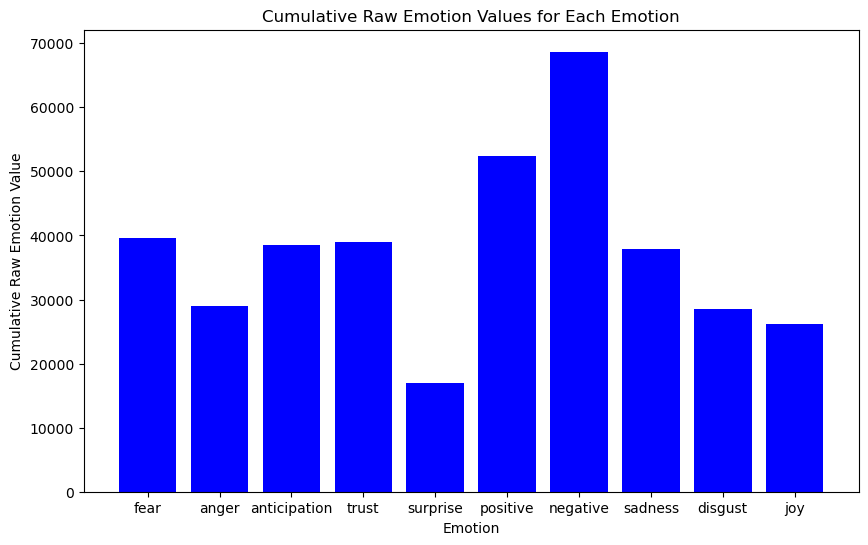

In [86]:
import matplotlib.pyplot as plt

# Assuming you already have cumulative_rawemo dictionary calculated

# Extract emotions and corresponding values
emotions = list(cumulative_rawemo.keys())
values = list(cumulative_rawemo.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, values, color='blue')
plt.title('Cumulative Raw Emotion Values for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Raw Emotion Value')
plt.show()

# Word cloud representation of reviews in df_final

> Meaning reviews which contain the word “issue” or “problem” and where the emotion “anger” or “fear” are present

In [50]:
!pip install wordcloud

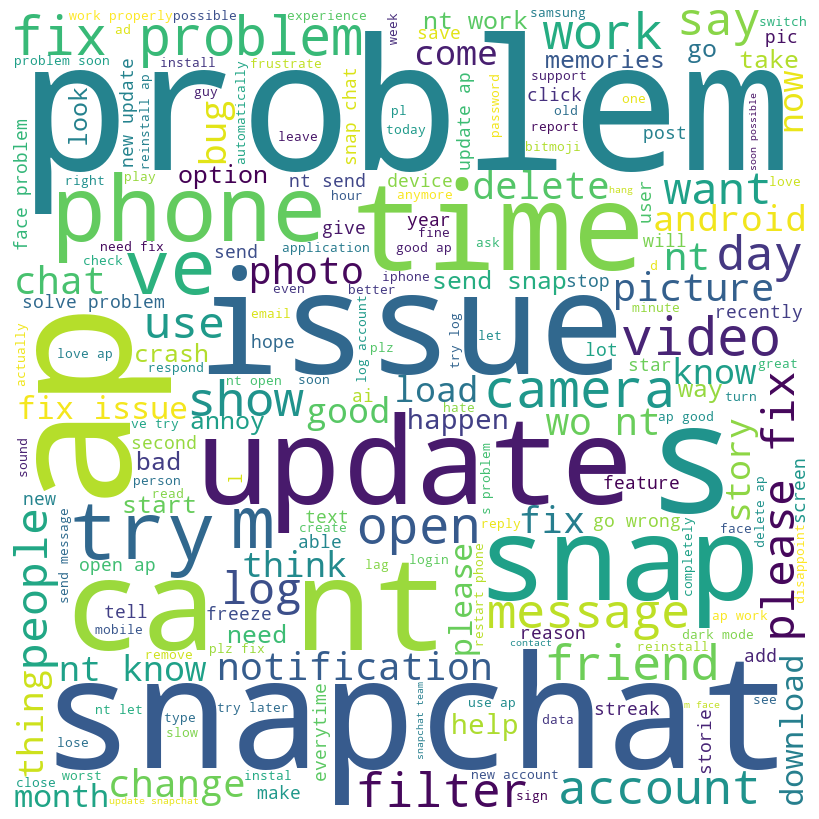

In [83]:
text1 = ""

for i in range(len(df_final)):
    text1=text1+df_final['Review'][i]
    
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
stopwords =set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text1)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# Further Analysis 

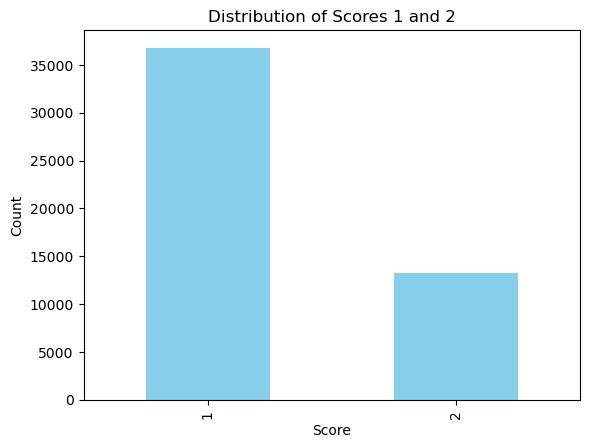

1    36785
2    13204
Name: score, dtype: int64


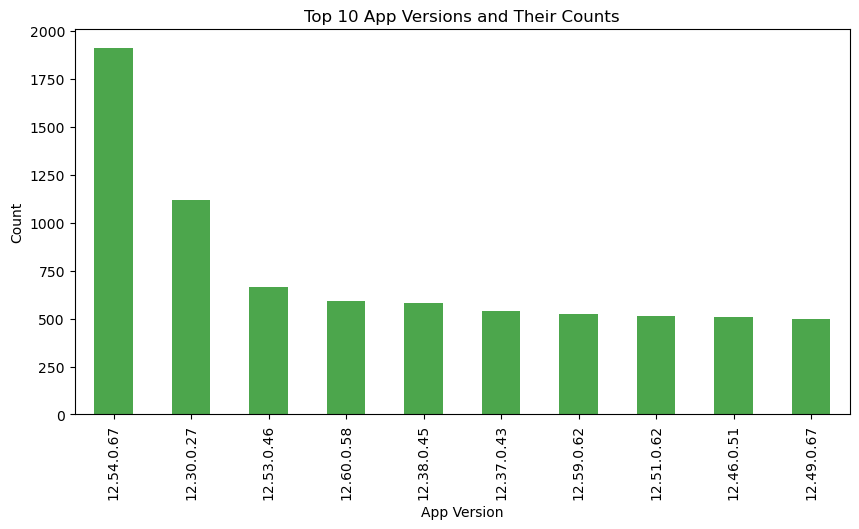

12.54.0.67    1911
12.30.0.27    1119
12.53.0.46     666
12.60.0.58     593
12.38.0.45     579
12.37.0.43     538
12.59.0.62     525
12.51.0.62     515
12.46.0.51     508
12.49.0.67     500
Name: appVersion, dtype: int64
Mean Number of Words: 37.63123887255196


In [99]:
# df1 dataframe

# Graph the scores of 1s and 2s
score_counts = df1[df1['score'].isin([1, 2])]['score'].value_counts()
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Scores 1 and 2')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
print(score_counts)
# Types of appVersion and their count
plt.figure(figsize=(10, 5))
app_version_counts = df1['appVersion'].value_counts().nlargest(10)
app_version_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 App Versions and Their Counts')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.show()
print(app_version_counts)

# Mean of the number of words
mean_words = df1['No_of_words'].mean()
print(f'Mean Number of Words: {mean_words}')